In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data = pd.read_csv("/content/drive/My Drive/academic/1001FinalProject/data/analysis_based_table.csv")

# Master code

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import sklearn as skn
import matplotlib.pyplot as plt
import seaborn as sn
import ast
import json
import re
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Import data
inflation = pd.read_csv("/content/drive/My Drive/academic/1001FinalProject/data/Inflation_Rate_1914_2020.csv", index_col = 0)
movies = pd.read_csv("/content/drive/My Drive/academic/1001FinalProject/data/movies.csv")
oscar = pd.read_csv("/content/drive/My Drive/academic/1001FinalProject/data/the_oscar_award.csv")
rot_movies = pd.read_csv("/content/drive/My Drive/academic/1001FinalProject/data/rotten/rt_movie_info.csv")

In [ ]:
movies

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [ ]:
rot_movies

,movie_link,movie_name,rating,genre,directors,writers,movie_info,poster_image,casts,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,box_office,critics_consensus,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_want_to_see_count,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count,audience_fresh_top_critics_count,audience_rotten_rotten_critics_count,tomatometer_avg_rating,audience_top_critics_avg_rating,score_sentiment,audience_avg_rating
0,/m/312291718,Tillie's Punctured Romance,NR,"Classics,Comedy","Charles Bennett,Mack Sennett",Hampton Del Ruth,"This Keystone comedy, Charlie Chaplin's 33rd, ...",https://resizing.flixster.com/2cfo_iZmt1DetxOR...,"Charles Chaplin,Marie Dressler,Mabel Normand,C...","Jan 1, 1914","Aug 24, 1999",73.0,Keystone Film Company,NaN,NaN,fresh,83.0,6,spilled,119,44.0,972.0,1,5,1,1,0,6.38,0.0,NEGATIVE,3.21
1,/m/770681144,Tango Tangles,NR,Comedy,Mack Sennett,Mack Sennett,Tango Tangles is an impromptu Keystone comedy ...,https://resizing.flixster.com/AJKmCcDUQqEOdT3n...,"Glen Cavender,Charles Chaplin,Edgar Kennedy,Fr...","Mar 9, 1914",NaN,12.0,Keystone Film Company,NaN,NaN,NaN,25.0,0,spilled,35,25.0,183.0,0,0,0,0,0,0.00,0.0,NEGATIVE,2.65
2,/m/20297,Cabiria,NR,"Art House & International,Classics,Drama",Giovanni Pastrone,Gabriele D'Annunzio,The ancient conflict between Rome and Carthage...,https://resizing.flixster.com/NA4TdKSRbmLNhJKw...,"Alex Bernard,Italia Almirante-Manzini,Lidia Qu...","Jun 1, 1914","Nov 7, 2000",181.0,Itala Film,NaN,NaN,fresh,89.0,9,upright,176,69.0,1153.0,4,8,1,4,0,7.75,10.0,POSITIVE,3.70
3,/m/770680394,The Magic Cloak of Oz,NR,"Action & Adventure,Drama,Kids & Family,Science...",J. Farrell MacDonald,L. Frank Baum,Author L. Frank Baum adapts his own original s...,https://resizing.flixster.com/qgZlce0CF5nUrmUX...,"Violet MacMillan,Vivian Reed,Mildred Harris,Fr...","Sep 28, 1914","May 22, 2001",45.0,NaN,NaN,NaN,NaN,NaN,0,spilled,0,NaN,NaN,0,0,0,0,0,0.00,0.0,NaN,NaN
4,/m/21368,Regeneration,NR,"Classics,Drama",Raoul Walsh,"Raoul Walsh,Carl Harbaugh",Noteworthy as the first ever feature-length cr...,https://resizing.flixster.com/1aKm46hSGRdsc_Fs...,"Rockliffe Fellowes,Anna Q. Nilsson,William She...","Sep 13, 1915","Nov 27, 2001",61.0,Fox Film Corporation,NaN,NaN,fresh,100.0,5,upright,54,65.0,401.0,2,5,0,2,0,9.17,0.0,POSITIVE,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12996,/m/572463126,Spooky Encounters (Gui da gui),R,"Action & Adventure,Art House & International,C...",Sammo Hung Kam-Bo,Sammo Hung Kam-Bo,Courageous Cheung (Sammo Hung) has a reputatio...,https://resizing.flixster.com/EBhOA9UEYYD02yhf...,"Sammo Hung Kam-Bo,Ching-Ying Lam,Chan Lung,Fat...",NaN,"Nov 14, 2000",100.0,Tai Seng,NaN,NaN,NaN,82.0,2,upright,123,82.0,1276.0,0,1,1,0,0,7.00,0.0,POSITIVE,4.03
12997,/m/770916867,Lady Luck,NR,"Comedy,Drama",Charles Lamont,John Krafft,"In this drama, a manicurist is mistaken for th...",https://resizing.flixster.com/b7Krc1GRxbH3b0-Q...,"Patricia Farr,William Bakewell,Duncan Renaldo,...",NaN,"Oct 28, 2008",62.0,Chesterfield Pictures Corporation,NaN,NaN,NaN,NaN,0,NaN,1,NaN,NaN,0,0,0,0,0,0.00,0.0,NaN,NaN
12998,/m/770876889,The Baltimore Bullet,PG,"Action & Adventure,Comedy",Robert Ellis Miller,"John F. Brascia,Robert Vincent O'Neil","James Coburn is ""The Baltimore Bullet"", a lege...",https://resizing.flixster.com/3aBh9qvL9P8VwKF_...,"James Coburn,Omar Sharif,Bruce Boxleitner,Rone...",NaN,NaN,103.0,AVCO Embassy Pictures,NaN,NaN,NaN,50.0,0,spilled,15,50.0,27.0,0,0,0,0,0,0.00,0.0,NEGATIVE,3.38
12999,/m/15618,Loose Shoes,R,Comedy,Ira Miller,"Ira Miller,Royce D. Applegate",Movie trailers are the target of this satiric ...,https://resizing.flixster.com/CAN2IeQ_99yw20pL...,"Lewis Arquette,Danny Dayton,Murphy Dunne,Howar...",NaN,"Feb 24, 2004",74.0,Atlantic Releasing Corporation,NaN,NaN,NaN,17.0,0,spill

1. Looking at the raw data

2. EDA and Data Cleaning - movies

In [ ]:
counts = movies['name'].value_counts().to_frame()
counts[counts['name'] > 1]

,name
Hamlet,3
Pulse,3
Mother,2
No Escape,2
Gladiator,2
...,...
Out Cold,2
Dream Lover,2
Max,2
The Phantom of the Opera,2


In [ ]:
movies.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [ ]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [ ]:
movies['country'].value_counts()

USA                               4872
UK                                 698
France                             283
Canada                             150
Germany                            134
Australia                           82
Japan                               68
Spain                               56
Italy                               51
Ireland                             44
Hong Kong                           39
India                               39
Denmark                             33
China                               24
South Korea                         20
New Zealand                         18
Sweden                              18
Belgium                             18
Mexico                              15
Argentina                           13
Netherlands                         12
Iran                                12
Russia                              10
South Africa                         9
Taiwan                               8
Czech Republic           

In [ ]:
movies['genre'].value_counts()

Comedy       2080
Drama        1444
Action       1331
Crime         522
Adventure     392
Biography     359
Horror        277
Animation     277
Mystery        38
Fantasy        32
Thriller       18
Romance        15
Family         14
Sci-Fi         13
Musical         4
Western         2
War             2
Name: genre, dtype: int64

In [ ]:
movies['rating'].value_counts()

R                3392
PG-13            1995
PG                951
NOT RATED         174
G                 147
UNRATED            71
Not specified      63
NC-17              22
B                   1
TV-14               1
TV-MA               1
B15                 1
TV-PG               1
Name: rating, dtype: int64

In [ ]:
movies.loc[movies['rating'] == 'NOT RATED','rating'] = 'UNRATED'
movies.loc[movies['rating'] == 'Not specified','rating'] = 'UNRATED'

In [ ]:
movies['rating'].value_counts()

R          3392
PG-13      1995
PG          951
UNRATED     308
G           147
NC-17        22
B             1
TV-14         1
TV-MA         1
B15           1
TV-PG         1
Name: rating, dtype: int64

[Text(0, 0.5, 'amount of movies'), Text(0.5, 0, 'rating category')]

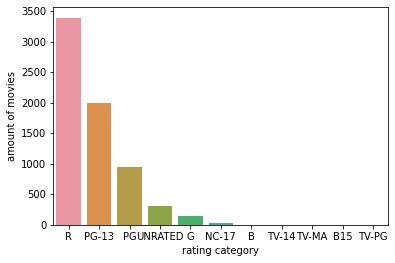

In [ ]:
ax = sn.barplot(x = movies['rating'].value_counts().index, y = movies['rating'].value_counts())
ax.set(xlabel="rating category", ylabel = "amount of movies")

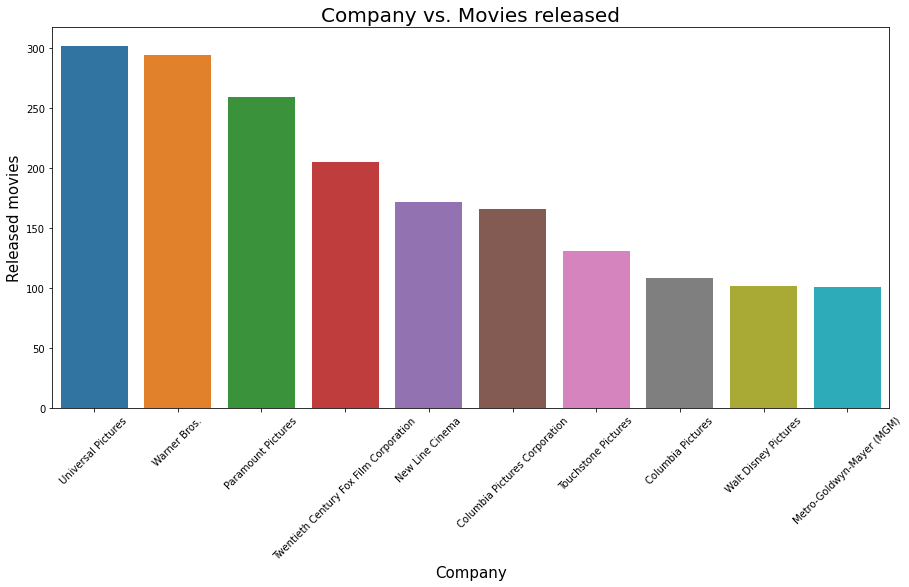

In [ ]:
company = movies['company'].value_counts()
company = pd.DataFrame(company) 
company = company.head(10) 
sn.barplot(x = company.index, y = company['company'])

labels = company.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Company vs. Movies released', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Released movies', fontsize = 15)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '45')
plt.show()

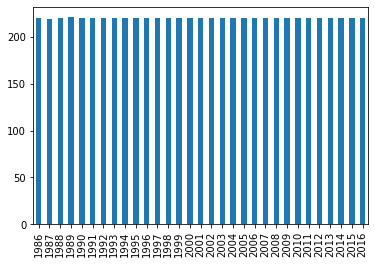

In [ ]:
movies.year.value_counts().sort_index().plot(kind='bar')

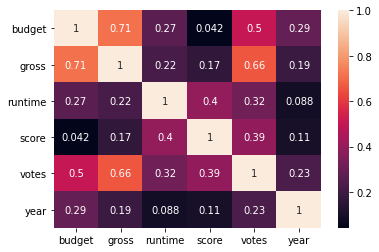

In [ ]:
corrMatrix = movies.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
movie_credit = pd.read_csv("/content/drive/My Drive/academic/1001FinalProject/data/movie_casting/tmdb_5000_credits.csv")
movie_2 = pd.read_csv("/content/drive/My Drive/academic/1001FinalProject/data/movie_casting/tmdb_5000_movies.csv")

In [ ]:
movie_2['title'].value_counts()

Batman                        2
The Host                      2
Out of the Blue               2
Halloween II                  1
The Curse of Downers Grove    1
                             ..
Some Guy Who Kills People     1
The Protector                 1
Bright Star                   1
The Runaways                  1
Boyhood                       1
Name: title, Length: 4800, dtype: int64

In [ ]:
movie_credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movie_2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
#add year column
movie_2.release_date = pd.to_datetime(movie_2.release_date)
movie_2['release_year'] = pd.DatetimeIndex(movie_2['release_date']).year

In [ ]:
movies.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'gross', 'name',
       'rating', 'released', 'runtime', 'score', 'star', 'votes', 'writer',
       'year'],
      dtype='object')

In [ ]:
#combine the imdb movie and movie credit
first_join = pd.merge(movie_2, movie_credit, how='inner', left_on='id',right_on = 'movie_id')
#join the imdb movie and original movie1 that have rating
second_join = pd.merge(first_join,movies, how = 'inner', left_on=['title_x','release_year'], right_on=['name','year'])

In [ ]:
second_join.columns

Index(['budget_x', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime_x',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'release_year', 'movie_id', 'title_y', 'cast', 'crew',
       'budget_y', 'company', 'country', 'director', 'genre', 'gross', 'name',
       'rating', 'released', 'runtime_y', 'score', 'star', 'votes', 'writer',
       'year'],
      dtype='object')

In [ ]:
first_join.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'release_year', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

In [ ]:
# delete the movies where budget is 0
final_join = second_join[(second_join['budget_x'] != 0) | (second_join['budget_y'] != 0)]
final_join = final_join.reset_index()
final_join.columns

Index(['index', 'budget_x', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime_x', 'spoken_languages', 'status', 'tagline',
       'title_x', 'vote_average', 'vote_count', 'release_year', 'movie_id',
       'title_y', 'cast', 'crew', 'budget_y', 'company', 'country', 'director',
       'genre', 'gross', 'name', 'rating', 'released', 'runtime_y', 'score',
       'star', 'votes', 'writer', 'year'],
      dtype='object')

In [ ]:
# find the movies count
final_join['title_x'].value_counts(ascending = False)

The Host                        2
The Purge: Election Year        1
Dudley Do-Right                 1
The Battle of Shaker Heights    1
This Is the End                 1
                               ..
The Cold Light of Day           1
The Big Short                   1
Drive Angry                     1
Rollerball                      1
Two Lovers                      1
Name: title_x, Length: 2947, dtype: int64

In [ ]:
# duplicate movies
final_join[final_join['title_x'] == 'The Host']

,index,budget_x,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime_x,spoken_languages,status,tagline,title_x,vote_average,vote_count,release_year,movie_id,title_y,cast,crew,budget_y,company,country,director,genre,gross,name,rating,released,runtime_y,score,star,votes,writer,year
881,885,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,72710,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[{""name"": ""Nick Wechsler Productions"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You will be one of us,The Host,6.0,1817,2013.0,72710,The Host,"[{""cast_id"": 52, ""character"": ""Melanie Stryder...","[{""credit_id"": ""52fe487bc3a368484e0fa919"", ""de...",40000000,Chockstone Pictures,USA,Andrew Niccol,Action,26627201,The Host,PG-13,2013-03-29,125,5.9,Saoirse Ronan,98678,Andrew Niccol,2013
2312,2343,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",http://www.hostmovie.com/,1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,Monsters are real.,The Host,6.7,537,2006.0,1255,The Host,"[{""cast_id"": 3, ""character"": ""Park Gang-du"", ""...","[{""credit_id"": ""52fe42eac3a36847f802ca6b"", ""de...",0,Showbox Entertainment,South Korea,Joon-ho Bong,Action,2201923,The Host,R,2007-03-30,120,7.0,Kang-ho Song,76265,Joon-ho Bong,2006


In [ ]:
#fill budget
final_join['budget'] = final_join.apply(lambda x: x['budget_y'] if x['budget_y'] != 0 else x['budget_x'],axis = 1)

2.1 Flatten keywords, genres, cast, crew

keywords

In [ ]:
final_join['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [ ]:
#change the strings to dictionary
final_join.loc[:,'keywords'] = final_join['keywords'].apply(lambda x: ast.literal_eval(x))

In [ ]:
#find the number of keywords in each movie
final_join.loc[:,'numKeywords'] = final_join['keywords'].apply(lambda x: len(x))

Text(0, 0.5, 'Count')

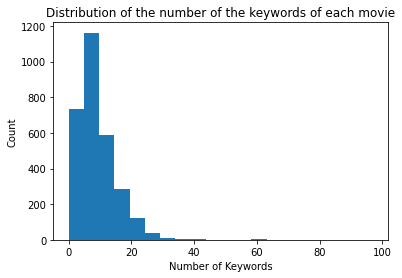

In [ ]:
#plot the distribution of the keywords
plt.hist(final_join['numKeywords'], bins = 20)
plt.title("Distribution of the number of the keywords of each movie")
plt.xlabel('Number of Keywords')
plt.ylabel('Count')

In [ ]:
#convert keywords to list
keyword = [val for sublist in final_join['keywords'].to_list() for val in sublist]

In [ ]:
#number of unique keywords
len(list({v['id']:v for v in keyword}.values()))

8085

In [ ]:
#find the number of occurence of each keyword in all the movies
result = {}
for v in keyword:
  name = v['name']
  if name in result:
    result[name] += 1
  else:
    result[name] = 1
keyword_df = pd.DataFrame(list(result.items()), columns = ['Keywords','Number of Occurrence'])

In [ ]:
keyword_df.sort_values('Number of Occurrence', ascending= False)

,Keywords,Number of Occurrence
101,duringcreditsstinger,252
407,woman director,181
38,based on novel,155
1802,independent film,147
36,aftercreditsstinger,131
...,...,...
4451,havanna,1
669,cuban missile crisis,1
4446,proof,1
679,merlin,1


Text(0, 0.5, 'Number of keywords remained')

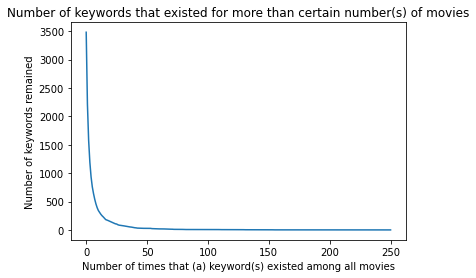

In [ ]:
length = []
for num in range(1,252):
  length.append(len(keyword_df[keyword_df['Number of Occurrence'] > num]))
plt.plot(length)
plt.title("Number of keywords that existed for more than certain number(s) of movies")
plt.xlabel("Number of times that (a) keyword(s) existed among all movies")
plt.ylabel("Number of keywords remained")
# I chose the cut off at 35. Only keywords that existed for 35 or more movies are kept in further analysis

In [ ]:
#use the keywords that occur more than 35 times
#total of 60
keyword_df[keyword_df['Number of Occurrence'] > 35].sort_values('Number of Occurrence', ascending= False)

,Keywords,Number of Occurrence
101,duringcreditsstinger,252
407,woman director,181
38,based on novel,155
1802,independent film,147
36,aftercreditsstinger,131
499,murder,121
1150,violence,111
309,dystopia,97
1535,sport,83
89,revenge,81


In [ ]:
len(keyword_df[keyword_df['Number of Occurrence'] > 35])

60

Text(0, 0.5, 'Frequency')

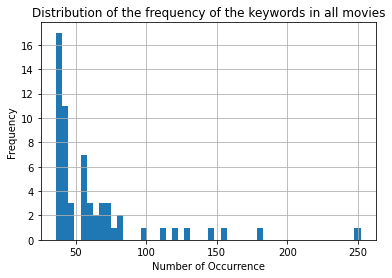

In [ ]:
#distribution of frequency of the keywords in all movies
keyword_df[keyword_df['Number of Occurrence'] > 35].hist(bins = 50)
plt.title("Distribution of the frequency of the keywords in all movies")
plt.xlabel('Number of Occurrence')
plt.ylabel('Frequency')

# adjust weight on the small types 

In [ ]:
top_keywords = keyword_df[keyword_df['Number of Occurrence'] > 35]['Keywords']

In [ ]:
top_keywords

9                              alien
20                                3d
25                love of one's life
36               aftercreditsstinger
38                    based on novel
40                            sequel
54                         superhero
70                            escape
89                           revenge
91                             magic
94                           musical
101             duringcreditsstinger
104              based on comic book
131                         daughter
137                           lawyer
156                         new york
166                      time travel
171                       corruption
203       based on young adult novel
217                             love
228                            fight
257                         suspense
309                         dystopia
342                      los angeles
358                       friendship
389                          friends
407                   woman director
4

In [ ]:
# Build a column that contain the only the top 60 keywords
# define a helper function that only keep the keywords we want
def top_keyword(keywordArr):
  result = []
  for keyword in keywordArr:
    name = keyword['name']
    if not top_keywords[top_keywords.isin([name])].empty:
      result.append(keyword)
  return result

In [ ]:
final_join.loc[:,'top_keyword'] = final_join['keywords'].apply(lambda x: top_keyword(x))
final_join.loc[:,'numTopKeyword'] = final_join['top_keyword'].apply(lambda x: len(x))

genres

In [ ]:
#genres for each movie in dictionary
final_join['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
#convert str into dictionary
final_join.loc[:,'genres'] = final_join['genres'].apply(lambda x: ast.literal_eval(x))
final_join.loc[:,'numGenres'] = final_join['genres'].apply(lambda x: len(x))

Text(0, 0.5, 'Count')

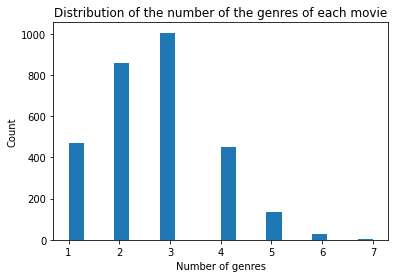

In [ ]:
plt.hist(final_join['numGenres'], bins = 20)
plt.title("Distribution of the number of the genres of each movie")
plt.xlabel('Number of genres')
plt.ylabel('Count')

In [ ]:
genres = [val for sublist in final_join['genres'].to_list() for val in sublist]

In [ ]:
len(list({v['id']:v for v in genres}.values()))

18

In [ ]:
result = {}
for v in genres:
  name = v['name']
  if name in result:
    result[name] += 1
  else:
    result[name] = 1
genres_df = pd.DataFrame(list(result.items()), columns = ['Genres','Number of Occurrence'])

In [ ]:
genres_df.sort_values('Number of Occurrence', ascending= False)

,Genres,Number of Occurrence
5,Drama,1369
10,Comedy,1170
6,Thriller,855
0,Action,808
1,Adventure,576
11,Romance,570
4,Crime,499
3,Science Fiction,349
8,Family,349
2,Fantasy,320


2. EDA and Data Cleaning - Oscar

In [ ]:
# Merge Oscar directing awards and calculate number of candidates and wins
oscar_directing = oscar.loc[oscar['category'] == 'DIRECTING']
oscar_movie = pd.merge(final_join, oscar_directing, left_on = 'director', right_on = 'name', how = 'left')
oscar_movie['candidate'] = (oscar_movie['winner'] >= 0) & (oscar_movie['year_ceremony'] < oscar_movie['released'].str.split('-').apply(lambda x: int(x[0])))
oscar_movie['win'] = (oscar_movie['winner'] == 1) & (oscar_movie['year_ceremony'] < oscar_movie['released'].str.split('-').apply(lambda x: int(x[0])))
oscar_movie_groupby = oscar_movie.groupby(['director', 'released'], sort = False)[['candidate', 'win']].aggregate('sum').reset_index()
final_join['candidate_director'] = oscar_movie_groupby['candidate']
final_join['win_director'] = oscar_movie_groupby['win']

In [ ]:
# Process main character information and extract 2 main characters
final_join['main_char'] = final_join['cast'].apply(lambda x: eval(x)[:2])

final_join['main_1_name'] = final_join['main_char'].apply(lambda x: x[0]['name'] if len(x) > 0 else '')

final_join['main_2_name'] = final_join['main_char'].apply(lambda x: x[1]['name'] if len(x) > 1 else '')

In [ ]:
# Merge Oscar acting awards for 1st main character and calculate number of candidates and wins
oscar_acting = oscar.loc[(oscar['category'] == 'ACTOR') | (oscar['category'] == 'ACTRESS') | (oscar['category'] == 'ACTOR IN A LEADING ROLE') |  (oscar['category'] == 'ACTRESS IN A LEADING ROLE')]
oscar_acting['gender'] = oscar['category'].apply(lambda x: 1 if x in ['ACTRESS', 'ACTRESS IN A LEADING ROLE'] else 2)

oscar_movie_main_1 = pd.merge(final_join, oscar_acting, left_on = 'main_1_name', right_on = 'name', how = 'left')
oscar_movie_main_1['candidate'] = (oscar_movie_main_1['winner'] >= 0) & (oscar_movie_main_1['year_ceremony'] < oscar_movie_main_1['released'].str.split('-').apply(lambda x: int(x[0])))
oscar_movie_main_1['win'] = (oscar_movie_main_1['winner'] == 1) & (oscar_movie_main_1['year_ceremony'] < oscar_movie_main_1['released'].str.split('-').apply(lambda x: int(x[0])))
oscar_movie_main_1_groupby = oscar_movie_main_1.groupby(['main_1_name', 'title_x'], sort = False)[['candidate', 'win']].aggregate('sum').reset_index()
final_join['main_1_candidate'] = oscar_movie_main_1_groupby['candidate']
final_join['main_1_win'] = oscar_movie_main_1_groupby['win']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Merge Oscar acting awards for 2nd main character and calculate number of candidates and wins
oscar_movie_main_2 = pd.merge(final_join, oscar_acting, left_on = 'main_2_name', right_on = 'name', how = 'left')
oscar_movie_main_2['candidate'] = (oscar_movie_main_2['winner'] >= 0) & (oscar_movie_main_2['year_ceremony'] < oscar_movie_main_2['released'].str.split('-').apply(lambda x: int(x[0])))
oscar_movie_main_2['win'] = (oscar_movie_main_2['winner'] == 1) & (oscar_movie_main_2['year_ceremony'] < oscar_movie_main_2['released'].str.split('-').apply(lambda x: int(x[0])))
oscar_movie_main_2_groupby = oscar_movie_main_2.groupby(['main_2_name', 'title_x'], sort = False)[['candidate', 'win']].aggregate('sum').reset_index()
final_join['main_2_candidate'] = oscar_movie_main_2_groupby['candidate']
final_join['main_2_win'] = oscar_movie_main_2_groupby['win']

In [ ]:
# Calculate sum of candidates and wins of both main characters
final_join['main_total_candidate'] = final_join['main_1_candidate'] + final_join['main_2_candidate']
final_join['main_total_win'] = final_join['main_1_win'] + final_join['main_2_win']

In [ ]:
# Merge Oscar writing awards and calculate number of candidates and wins
writing_options = oscar['category'].loc[oscar['category'].apply(lambda x: re.match('WRITING', x)).notna()].unique()
oscar_writing = oscar.loc[oscar['category'].apply(lambda x: x in writing_options)]

oscar_movie_writing = pd.merge(final_join, oscar_writing, left_on = 'writer', right_on = 'name', how = 'left')
oscar_movie_writing['candidate'] = (oscar_movie_writing['winner'] >= 0) & (oscar_movie_writing['year_ceremony'] < oscar_movie_writing['released'].str.split('-').apply(lambda x: int(x[0])))
oscar_movie_writing['win'] = (oscar_movie_writing['winner'] == 1) & (oscar_movie_writing['year_ceremony'] < oscar_movie_writing['released'].str.split('-').apply(lambda x: int(x[0])))
oscar_movie_writing_groupby = oscar_movie_writing.groupby(['writer', 'title_x'], sort = False)[['candidate', 'win']].aggregate('sum').reset_index()
final_join['writer_candidate'] = oscar_movie_writing_groupby['candidate']
final_join['writer_win'] = oscar_movie_writing_groupby['win']

Inflation

Justify all movie revenue to the CPI (Consumer Price Index) in 2020 Sep

In [ ]:
# define a function that convert monthly inflation rate to an annual inflation rate
def toAccumulativeYear(df):
  result = []
  first_row = True
  curr_cumulative_inf = 0
  for inf in df['Annual Inflation rate percent']:
    if first_row:
      result.append(0)
      first_row = False
    else: 
      curr_cumulative_inf = (curr_cumulative_inf + 1) * (inf/100 + 1) - 1
      result.append(curr_cumulative_inf)
  result = pd.DataFrame(result, index=df.index, columns=["Annual Inflation rate"])
  return result

In [ ]:
inflation = inflation.iloc[inflation.index >= 1986]
inflation_year = inflation['DEC']
inflation_year=inflation_year.to_frame()
inflation_year.columns = ['Annual Inflation rate percent']
inflation_year = inflation_year.iloc[:-1,:]
# this is in percent
# 1.1 means 1.1%

In [ ]:
inflation_base1986 = toAccumulativeYear(inflation_year)
# This is not in percent
# 1.325 means 132.5%

In [ ]:
inflation_base1986.loc[1986]

Annual Inflation rate    0.0
Name: 1986, dtype: float64

In [ ]:
# takes in 2 variables from each row
def to2019(budget, year):
  budget_1986 = budget/(1+inflation_base1986.loc[year])
  budget_2019 = budget_1986*(1+inflation_base1986.loc[year])
  return budget_2019
# use this to convert all movie budgets

In [ ]:
final_join.year.dtypes

dtype('int64')

In [ ]:
#change budget
final_join['budget'] = final_join.apply(lambda x: to2019(x['budget'],x['year']),axis = 1)

In [ ]:
#change revenue
final_join['gross'] = final_join.apply(lambda x: to2019(x['gross'],x['year']),axis = 1)

In [ ]:
final_join['release_month'] = final_join['release_date'].dt.month

In [ ]:
final_join = final_join.drop(columns = ['homepage','id','keywords','overview','popularity','production_companies','production_countries','spoken_languages',
                           'status','tagline','title_y','vote_average','vote_count','movie_id','cast','crew','budget_y','name','released',
                           'runtime_y', 'score','votes','year','numKeywords','main_char','revenue','budget_x', 'release_date'])
final_join = final_join.drop(columns = 'index')

In [ ]:
final_join['gross'] = np.log(final_join['gross'])
final_join['budget'] = np.log(final_join['budget'])

In [ ]:
final_join.to_csv('/content/drive/My Drive/academic/1001FinalProject/data/analysis_base_table.csv')